In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import os

In [2]:
%matplotlib inline

sns.set(
    'paper', font_scale=2.0,
        rc={'lines.linewidth': 2,
            'text.usetex' : True,
            'image.interpolation': 'nearest',
            'image.cmap': 'gray',
            'figure.figsize': (10.0, 8.0),
            'legend.frameon': True,
            'legend.fancybox': True,
            }
       )
sns.set_style('whitegrid', {'axes.grid' : False})
sns.set_palette(sns.color_palette("Paired",10), 10, color_codes=False)

In [3]:
root = '../codes/maskrcnn-benchmark/results'
exp = 'e2e_faster_rcnn_R_101_C4_1x_cocostyle'
dataset = 'mosquitoes_cocostyle_CEFET_test'
res = torch.load(os.path.join(root, exp, 'inference' ,dataset, 'resbbox.pth'))
p = res.eval['params']

In [4]:
T = len(p.iouThrs)
R = len(p.recThrs)
K = len(p.catIds) if p.useCats else 1
A = len(p.areaRng)
M = len(p.maxDets)

In [5]:
prec = res.eval['precision']
rec = res.eval['recall']

print(prec.shape)
print(rec.shape)

(10, 101, 1, 4, 3)
(10, 1, 4, 3)


In [6]:
res.eval['params'].maxDets

[1, 10, 100]

In [7]:
rect_1 = patches.Rectangle((-0.01,0.8),.3,.23,linewidth=1, linestyle=':', edgecolor='gray',facecolor='none')
rect_2 = patches.Rectangle((0.5,0.8),.2,.23,linewidth=1, linestyle=':',  edgecolor='gray',facecolor='none')

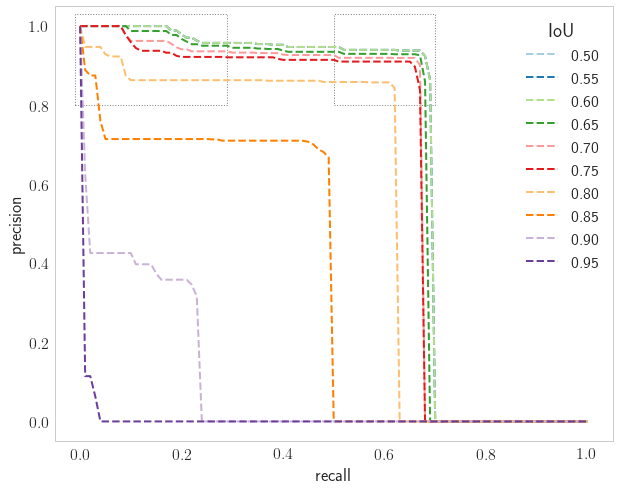

In [8]:
idx = range(0,10)
for i in idx:
    plt.plot(p.recThrs, prec[i,:,0,0,-1], '--')
plt.legend([f'{iou:.2f}' for iou in p.iouThrs[idx]], 
           title='IoU', 
           fancybox = True,
           loc='upper right', 
#            bbox_to_anchor=(1., .5),
           shadow=True,
          )

ax = plt.gca()
ax.add_patch(rect_1)
ax.add_patch(rect_2)

plt.ylabel('precision')
plt.xlabel('recall')
plt.savefig(f'pr_curve_{exp}.pdf',bbox_inches='tight')
plt.show()

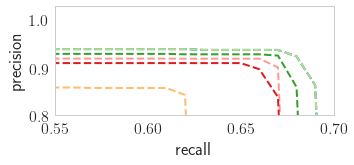

In [9]:
idx = range(0,10)
plt.figure(figsize=(5,2))
for i in idx:
    plt.plot(p.recThrs, prec[i,:,0,0,-1], '--')
plt.ylabel('precision')
plt.xlabel('recall')
plt.ylim([0.8, 1.03])
plt.xlim([0.55, 0.7])
plt.savefig(f'pr_curve_{exp}_zoom_2.pdf',bbox_inches='tight')
plt.show()

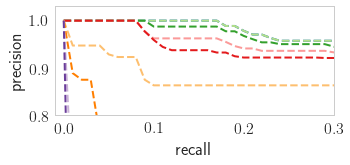

In [10]:
idx = range(0,10)
plt.figure(figsize=(5,2))
for i in idx:
    plt.plot(p.recThrs, prec[i,:,0,0,-1], '--')
plt.ylabel('precision')
plt.xlabel('recall')
plt.ylim([0.8, 1.03])
plt.xlim([-0.01, 0.3])
plt.savefig(f'pr_curve_{exp}_zoom_1.pdf',bbox_inches='tight')
plt.show()

# Models Comparison

In [11]:
root = '../codes/maskrcnn-benchmark/results'
dataset = 'mosquitoes_cocostyle_CEFET_test'
exp = ['e2e_faster_rcnn_R_50_C4_1x_cocostyle_NO-AUG',
       'e2e_faster_rcnn_R_50_C4_1x_cocostyle',
       'e2e_faster_rcnn_R_101_C4_1x_cocostyle',
      ]


res = {exp[m]:
       torch.load(os.path.join(root, exp[m], 'inference' ,dataset, 'resbbox.pth'))
       for m in range(len(exp))
}

p = {exp[m]:
     res[exp[m]].eval['params']
     for m in range(len(exp))
}
    

In [12]:
prec = {exp[m]:
     res[exp[m]].eval['precision']
     for m in range(len(exp))
}

rec = {exp[m]:
     res[exp[m]].eval['recall']
     for m in range(len(exp))
}

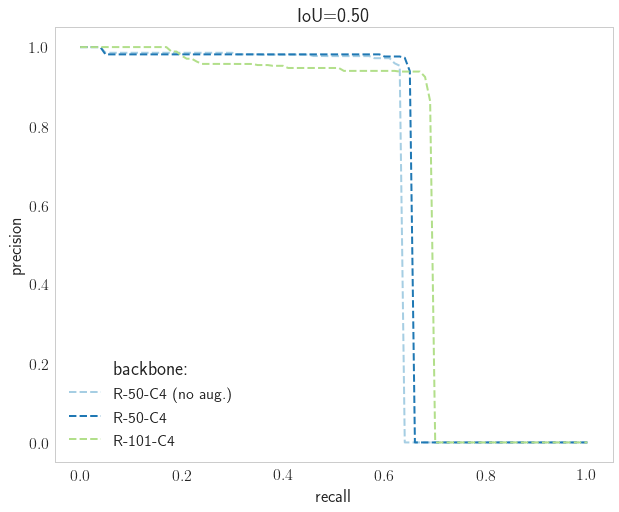

In [13]:
i = 0
for k in p.keys():
    plt.plot(p[k].recThrs, prec[k][i,:,0,0,-1], '--')

# CAUTION! It's HARDCODED!!!!
plt.legend(['R-50-C4 (no aug.)', 'R-50-C4', 'R-101-C4' ],title='backbone:', 
           fancybox = True,
           loc='lower left', 
#            bbox_to_anchor=(1., .5),
           shadow=True,
          )
plt.title(f'IoU={p[exp[0]].iouThrs[i]:.2f}')

plt.ylabel('precision')
plt.xlabel('recall')
plt.savefig(f'pr_curve_comp_{int(p[exp[0]].iouThrs[i]*100):d}.pdf',bbox_inches='tight')
plt.show()

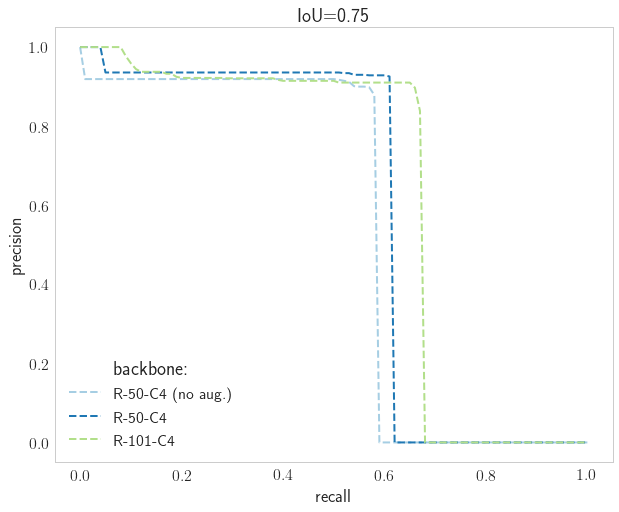

In [14]:
i = 5
for k in p.keys():
    plt.plot(p[k].recThrs, prec[k][i,:,0,0,-1], '--')

# CAUTION! It's HARDCODED!!!!
plt.legend(['R-50-C4 (no aug.)', 'R-50-C4', 'R-101-C4' ],title='backbone:', 
           fancybox = True,
           loc='lower left', 
#            bbox_to_anchor=(1., .5),
           shadow=True,
          )
plt.title(f'IoU={p[exp[0]].iouThrs[i]:.2f}')

plt.ylabel('precision')
plt.xlabel('recall')
plt.savefig(f'pr_curve_comp_{int(p[exp[0]].iouThrs[i]*100):d}.pdf',bbox_inches='tight')
plt.show()